# Importing Libararies Needed
Various libraries are needed to process the data and predicit data.
Like Numpy, Pandas and Scikit Learn Library.

In [67]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,precision_recall_curve, f1_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, average_precision_score, roc_auc_score

# Data visualization using graphs.
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

# **Importing the DataSet from google drive (Emotions.csv)**
The dataset you provided is EEG (Electroencephalography) brainwave data that has been collected and processed to study mental and emotional states. EEG is a technique used to record electrical activity in the brain, and it can be used to investigate various aspects of cognitive and emotional processes. In this dataset, the goal is to discern whether someone is feeling good or experiencing positive, neutral, or negative emotional states based on their EEG data.

#Here are the key details about the dataset:

**Data Source**: The data was collected from two individuals, one male and one female, with EEG recordings. These recordings were taken for three minutes per emotional state: positive, neutral, and negative. Additionally, six minutes of resting neutral data were recorded. EEG placements were recorded using a Muse EEG headband with dry electrodes at the following locations: TP9, AF7, AF8, and TP10.

**Emotional States**: The emotional states were induced using specific stimuli. These stimuli are movie scenes or clips chosen to elicit particular emotional responses. For example:
- "Marley and Me" was used to induce a negative emotional state with a focus on  a death scene.
- "Up" was also used for a negative emotional state, focusing on an opening death scene.
- "My Girl" was used for a negative emotional state, specifically a funeral scene.
- "La La Land" and "Slow Life" were used to induce positive emotional states with opening musical numbers and nature timelapse clips, respectively.
- "Funny Dogs" was used to induce a positive emotional state with funnydog clips.

**Data Processing**: The data has been processed using a method of statistical extraction, which involved resampling the EEG data to describe brainwave patterns in a temporal fashion.

-**Citation**: If you intend to use this dataset for research projects, you should cite the following papers:
- J. J. Bird, L. J. Manso, E. P. Ribiero, A. Ekart, and D. R. Faria, "A study on mental state classification using EEG-based brain-machine interface," in 9th International Conference on Intelligent Systems, IEEE, 2018.
- J. J. Bird, A. Ekart, C. D. Buckingham, and D. R. Faria, "Mental emotional sentiment classification with an EEG-based brain-machine interface," in The International Conference on Digital Image and Signal Processing (DISP’19), Springer, 2019.

This dataset and research were partially supported by the EIT Health GRaCE-AGE grant number 18429 awarded to C.D. Buckingham.

In [68]:
from google.colab import drive
drive.mount('/content/drive')
# Loading csv data from emotions.csv
data = pd.read_csv('/content/drive/My Drive/emotions.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Splitting data into training dataset and testing dataset.
 Firstly dataset with Ratio of **70:30** . i.e. 70% training data and 30% testing data from dataset. With random state of value 42.

Data parameter and target looks like this:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1

<Axes: >

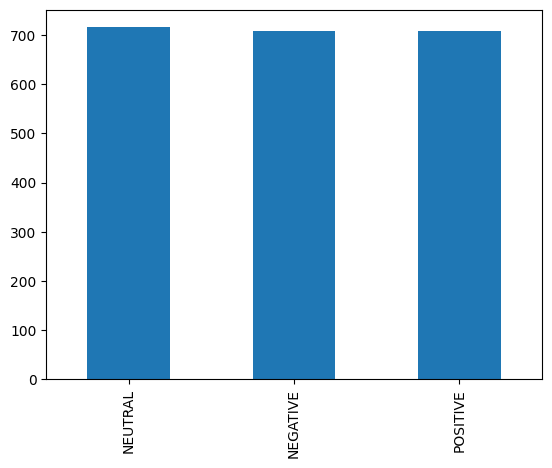

In [69]:
# X will be all parameters without the result ie emotional state.
X = data.drop('label',axis=1)
# y will be the result i.e. the emotional state of person.
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Visualization
print("Data parameter and target looks like this:")
print(data.head())
data['label'].value_counts().plot.bar()

# Training model using Random Forest Classification.
Using n_estimator = 10 i.e. number of decision trees to form, max_depth = 20 i.e. max height decision trees can take and build children nodes, min_samples_split=2 and min_samples_leaf=1.

In [70]:
# Creating object for random forest classifier.
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1
)

# Fitting the training dataset.
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10)

# **Predicting the Emotion is 70:30 datset.**
Predict the data using X_test dataset.

In [71]:
# Predicting the emotion of the user.
y_pred = rf.predict(X_test)

# Evaluation metrices:

**Accuracy**

In [72]:
# Accuracy
accuracy_70_30 = accuracy_score(y_test, y_pred)
print("Accuracy obtained in 70:30 datasplit is : ",accuracy_70_30)

Accuracy obtained in 70:30 datasplit is :  0.9640625


**Precision**

In [73]:
# Precision
precision_70_30 = precision_score(y_test, y_pred, average='macro')
print("Precsion obtained in 70:30 datasplit is :",precision_70_30)

Precsion obtained in 70:30 datasplit is : 0.9643381769752409


**Recall Value**

In [74]:
# Recall Value
recall_70_30 = recall_score(y_test, y_pred, average='macro')
print("Recall value obtained in 70:30 datasplit is :",recall_70_30)

Recall value obtained in 70:30 datasplit is : 0.9637093428505098


**F1 Score**

In [75]:
# F1 Score
f1_70_30 = f1_score(y_test, y_pred,average='macro')
print("Recall value obtained in 70:30 datasplit is :",f1_70_30)

Recall value obtained in 70:30 datasplit is : 0.9638249422920954


**AUCROC**

In [76]:
# Get predicted class probabilities for the test set
y_pred_prob = rf.predict_proba(X_test)
# Compute the false positive rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(roc_auc)

0.9971618498629149



**Confusion Matrix and its visualization.**

Confusion matrix for 70:30 datasplit:
[[211   0   5]
 [  0 212   3]
 [ 13   2 194]]


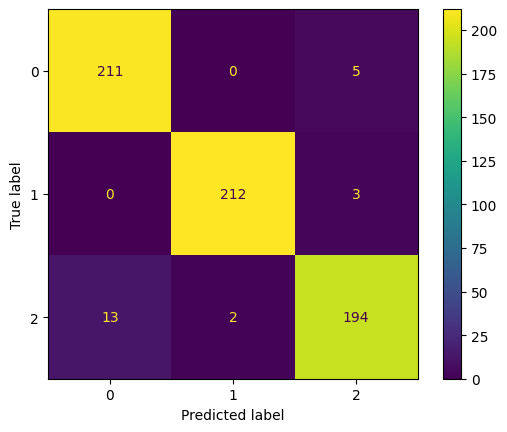

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for 70:30 datasplit:")
print(cm)

# Visualizing confusion Matrix.
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


**Mathews Correlation Coefficient**

In [78]:
# Matthews Correlation Coefficient with 'macro' averaging
mcc_macro = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (Macro):", mcc_macro)

Matthews Correlation Coefficient (Macro): 0.9462758713643655


**Cohen's Kappa**

In [79]:
# Cohen's Kappa with 'macro' averaging
kappa_macro = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa (Macro):", kappa_macro)

Cohen's Kappa (Macro): 0.9460782158922737


# Classification Report

In [80]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    NEGATIVE       0.94      0.98      0.96       216
     NEUTRAL       0.99      0.99      0.99       215
    POSITIVE       0.96      0.93      0.94       209

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# Decision Tree Visualization

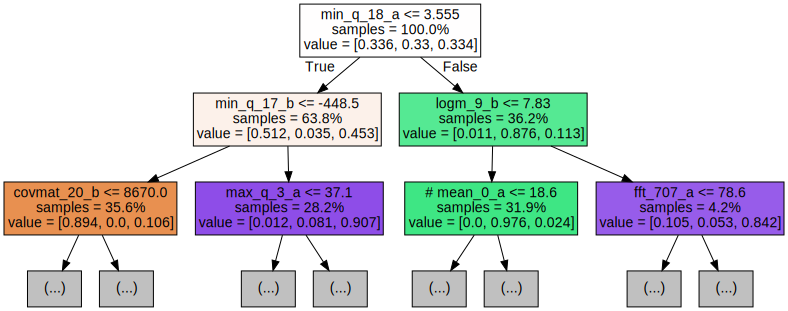

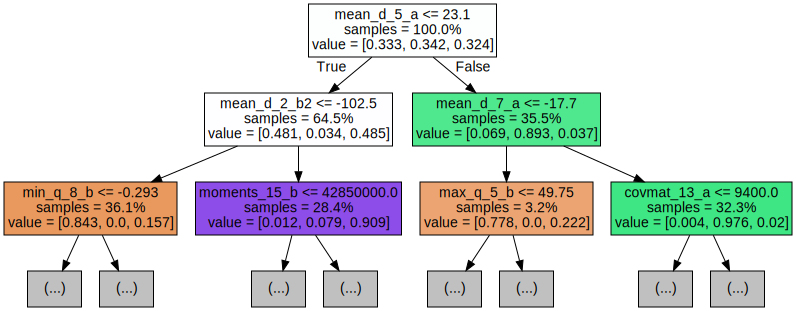

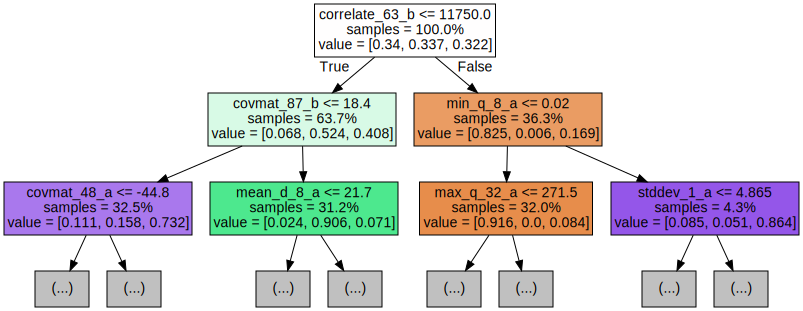

In [81]:
# Decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Cross Validation using K-Fold method with fold value of 5.
Perform cross validation using cross_val_score with cv=5.

In [82]:
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.97423888 0.97892272 0.99061033 0.96948357 0.9600939 ]
Mean Accuracy: 0.9746698771866169


============================= Data Set 80:20 =======================
# **Predicting the Emotion is 80:20 datset.**
Predict the data using X_test dataset.

In [83]:
# Predicting the emotion of the user.
y_pred = rf.predict(X_test)

# Evaluation metrices:

**Accuracy**

In [84]:
# Accuracy
accuracy_80_20 = accuracy_score(y_test, y_pred)
print("Accuracy obtained in 80:20 datasplit is : ",accuracy_80_20)

Accuracy obtained in 80:20 datasplit is :  0.9640625


**Precision**

In [85]:
# Precision
precision_80_20 = precision_score(y_test, y_pred, average='macro')
print("Precsion obtained in 80:20 datasplit is :",precision_80_20)

Precsion obtained in 80:20 datasplit is : 0.9643381769752409


**Recall Value**

In [86]:
# Recall Value
recall_80_20 = recall_score(y_test, y_pred, average='macro')
print("Recall value obtained in 80:20 datasplit is :",recall_80_20)

Recall value obtained in 80:20 datasplit is : 0.9637093428505098


**F1 Score**

In [87]:
# F1 Score
f1_80_20 = f1_score(y_test, y_pred,average='macro')
print("Recall value obtained in 80:20 datasplit is :",f1_80_20)

Recall value obtained in 80:20 datasplit is : 0.9638249422920954


**AUCROC**

In [88]:
# Get predicted class probabilities for the test set
y_pred_prob = rf.predict_proba(X_test)
# Compute the false positive rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(roc_auc)

0.9971618498629149



**Confusion Matrix and its visualization.**

Confusion matrix for 80:20 datasplit:
[[211   0   5]
 [  0 212   3]
 [ 13   2 194]]


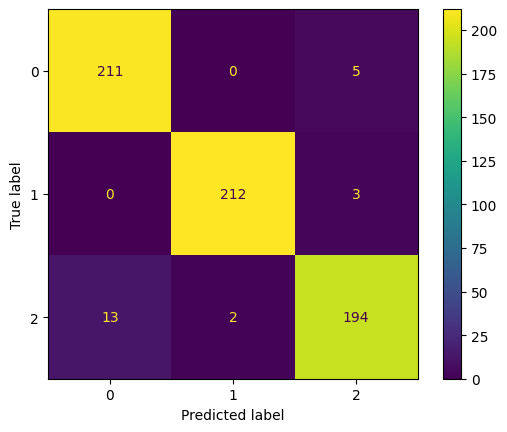

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for 80:20 datasplit:")
print(cm)

# Visualizing confusion Matrix.
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


**Mathews Correlation Coefficient**

In [90]:
# Matthews Correlation Coefficient with 'macro' averaging
mcc_macro = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (Macro):", mcc_macro)

Matthews Correlation Coefficient (Macro): 0.9462758713643655


**Cohen's Kappa**

In [91]:
# Cohen's Kappa with 'macro' averaging
kappa_macro = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa (Macro):", kappa_macro)

Cohen's Kappa (Macro): 0.9460782158922737


# Classification Report

In [92]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    NEGATIVE       0.94      0.98      0.96       216
     NEUTRAL       0.99      0.99      0.99       215
    POSITIVE       0.96      0.93      0.94       209

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# Decision Tree Visualization

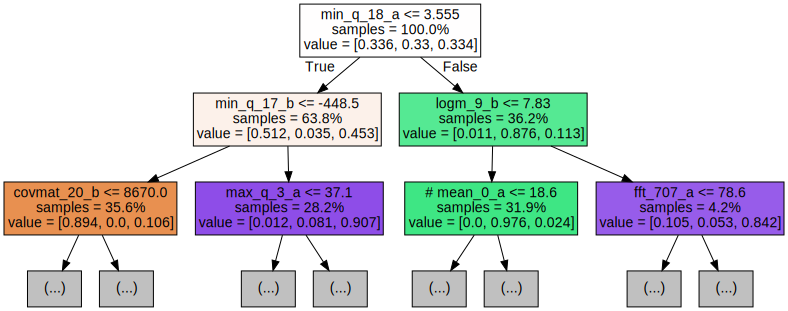

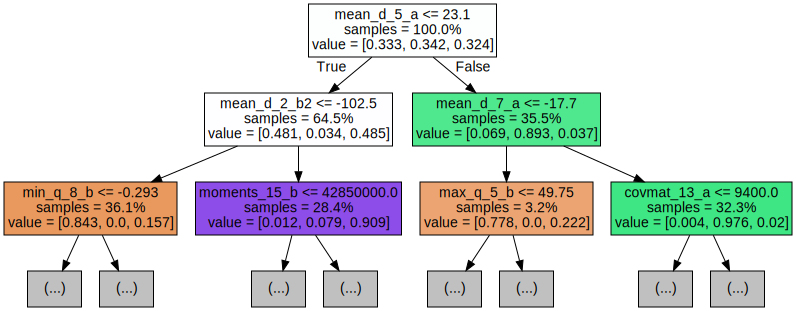

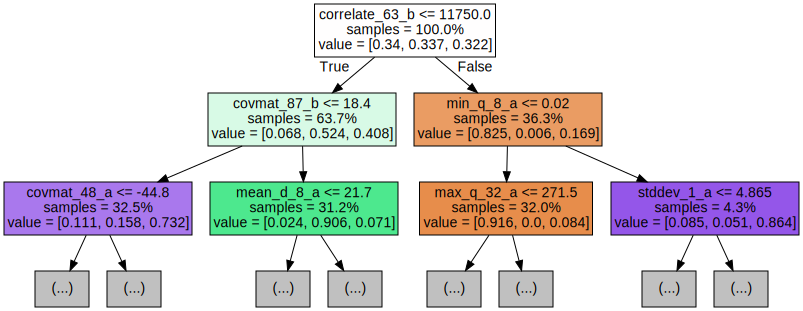

In [93]:
# Decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Cross Validation using K-Fold method with fold value of 5.
Perform cross validation using cross_val_score with cv=5.

In [94]:
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.97423888 0.9882904  0.9741784  0.98122066 0.96478873]
Mean Accuracy: 0.9765434134863827


==================================== Data Set 90:10 ============================
# **Predicting the Emotion is 90:10 datset.**
Predict the data using X_test dataset.

In [95]:
# Predicting the emotion of the user.
y_pred = rf.predict(X_test)

# Evaluation metrices:

**Accuracy**

In [96]:
# Accuracy
accuracy_90_10 = accuracy_score(y_test, y_pred)
print("Accuracy obtained in 90:10 datasplit is : ",accuracy_90_10)

Accuracy obtained in 90:10 datasplit is :  0.9640625


**Precision**

In [97]:
# Precision
precision_90_10 = precision_score(y_test, y_pred, average='macro')
print("Precsion obtained in 90:10 datasplit is :",precision_90_10)

Precsion obtained in 90:10 datasplit is : 0.9643381769752409


**Recall Value**

In [98]:
# Recall Value
recall_90_10 = recall_score(y_test, y_pred, average='macro')
print("Recall value obtained in 90:10 datasplit is :",recall_90_10)

Recall value obtained in 90:10 datasplit is : 0.9637093428505098


**F1 Score**

In [99]:
# F1 Score
f1_90_10 = f1_score(y_test, y_pred,average='macro')
print("Recall value obtained in 70:30 datasplit is :",f1_90_10)

Recall value obtained in 70:30 datasplit is : 0.9638249422920954


**AUCROC**

In [100]:
# Get predicted class probabilities for the test set
y_pred_prob = rf.predict_proba(X_test)
# Compute the false positive rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(roc_auc)

0.9971618498629149



**Confusion Matrix and its visualization.**

Confusion matrix for 90:10 datasplit:
[[211   0   5]
 [  0 212   3]
 [ 13   2 194]]


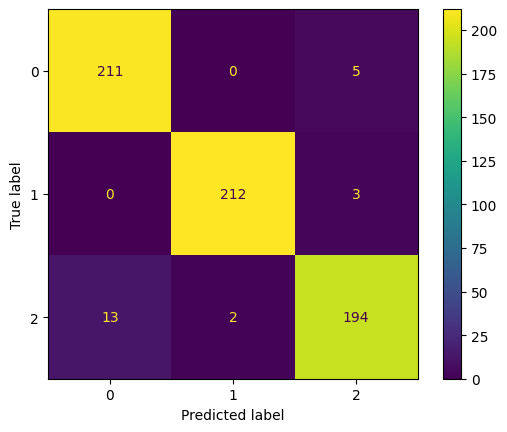

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for 90:10 datasplit:")
print(cm)

# Visualizing confusion Matrix.
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


**Mathews Correlation Coefficient**

In [102]:
# Matthews Correlation Coefficient with 'macro' averaging
mcc_macro = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (Macro):", mcc_macro)

Matthews Correlation Coefficient (Macro): 0.9462758713643655


**Cohen's Kappa**

In [103]:
# Cohen's Kappa with 'macro' averaging
kappa_macro = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa (Macro):", kappa_macro)

Cohen's Kappa (Macro): 0.9460782158922737


# Classification Report

In [104]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    NEGATIVE       0.94      0.98      0.96       216
     NEUTRAL       0.99      0.99      0.99       215
    POSITIVE       0.96      0.93      0.94       209

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# Decision Tree Visualization

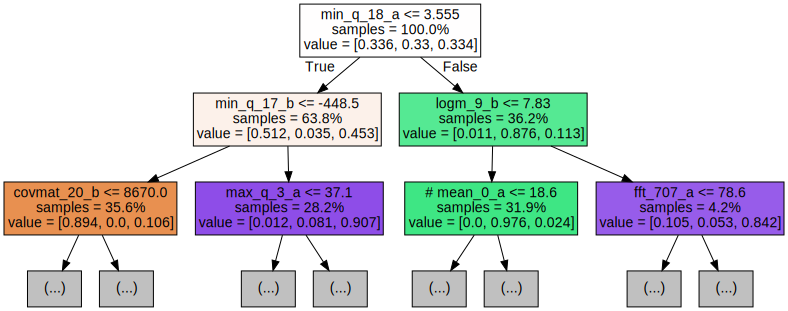

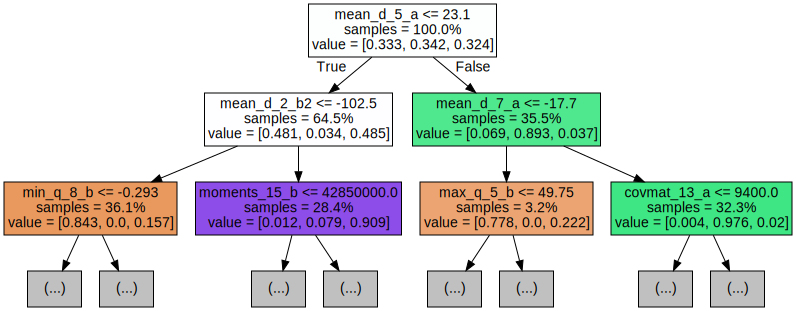

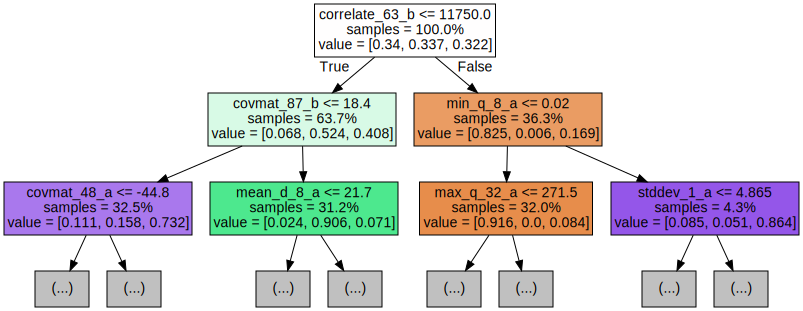

In [105]:
# Decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Cross Validation using K-Fold method with fold value of 5.
Perform cross validation using cross_val_score with cv=5.

In [106]:
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.96955504 0.98126464 0.98591549 0.96713615 0.9741784 ]
Mean Accuracy: 0.9756099438159008
